In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train_4d = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4d = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print(x_train_4d.shape)
print(x_test_4d.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
x_train_normalize = x_train_4d / 255
x_test_normalize = x_test_4d / 255
print(x_train_normalize.shape)
print(x_test_normalize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(60000, 10)
(10000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
#                  input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [8]:
%%time
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x = x_train_normalize, y = y_train_onehot, validation_split = 0.2, epochs = 20, batch_size = 300, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 75s - loss: 0.4341 - acc: 0.8661 - val_loss: 0.1051 - val_acc: 0.9681
Epoch 2/20
 - 76s - loss: 0.1147 - acc: 0.9646 - val_loss: 0.0701 - val_acc: 0.9795
Epoch 3/20
 - 74s - loss: 0.0789 - acc: 0.9756 - val_loss: 0.0540 - val_acc: 0.9836
Epoch 4/20
 - 102s - loss: 0.0625 - acc: 0.9805 - val_loss: 0.0463 - val_acc: 0.9873
Epoch 5/20
 - 88s - loss: 0.0538 - acc: 0.9831 - val_loss: 0.0421 - val_acc: 0.9866
Epoch 6/20
 - 82s - loss: 0.0468 - acc: 0.9851 - val_loss: 0.0372 - val_acc: 0.9894
Epoch 7/20
 - 88s - loss: 0.0410 - acc: 0.9869 - val_loss: 0.0349 - val_acc: 0.9894
Epoch 8/20
 - 97s - loss: 0.0364 - acc: 0.9881 - val_loss: 0.0368 - val_acc: 0.9893
Epoch 9/20
 - 89s - loss: 0.0339 - acc: 0.9892 - val_loss: 0.0362 - val_acc: 0.9900
Epoch 10/20
 - 96s - loss: 0.0304 - acc: 0.9902 - val_loss: 0.0310 - val_acc: 0.9912
Epoch 11/20
 - 72s - loss: 0.0269 - acc: 0.9909 - val_loss: 0.0318 - val_acc: 0.9916
Epoch 12/20
 - 72s - lo

In [9]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend([train, validation])
    plt.show()

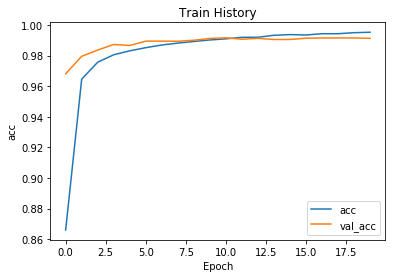

In [10]:
show_train_history(train_history, 'acc', 'val_acc')

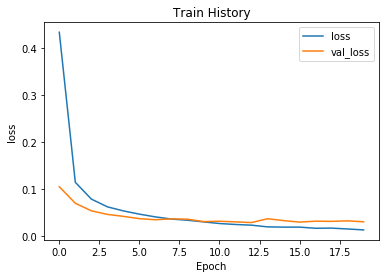

In [11]:
show_train_history(train_history, 'loss', 'val_loss')

In [12]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print(scores)

10000/10000 [==============================] - 7s 663us/step
[0.023529468678966624, 0.9925]


In [13]:
model.save('models/mnist.h5')

In [14]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 20)
    for i in range(0, num):
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(images[idx])
        title = 'L: ' + str(labels[idx])
        if len(prediction) > 0:
            title = title + '\n' + 'P: ' + str(prediction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

In [15]:
prediction = model.predict_classes(x_test_normalize)

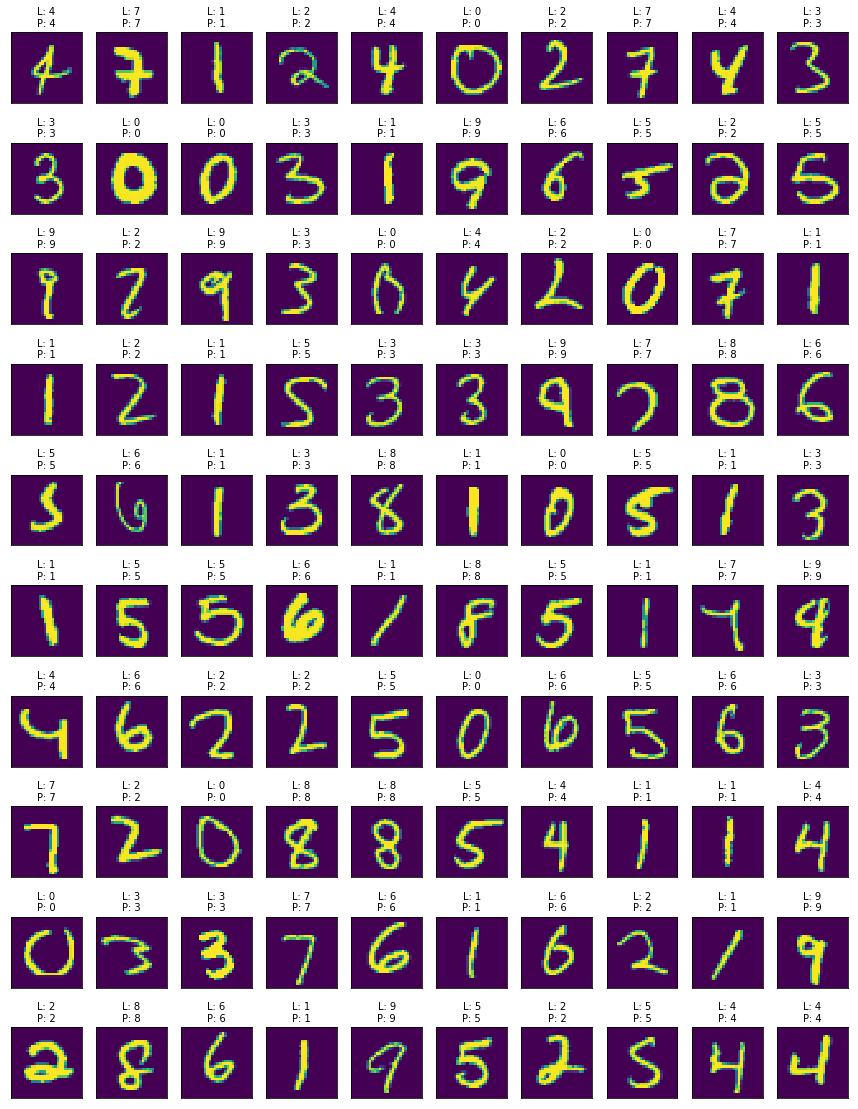

In [17]:
plot_images_labels_prediction(x_test, y_test, prediction, 300, 100)